In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import scipy.stats
import math
star_data = pd.read_excel(r'star_data.xlsx')
star_data

,B-V,Vmag,Log.Teff,logL,Age,Mass,Prob
1,0.45,7.32,3.808,3.42,24800000,7.67,1
2,0.45,7.32,3.808,3.42,38200000,6.75,54
3,0.45,7.32,3.808,3.42,45900000,6.47,45
4,0.71,7.38,3.767,3.39,24700000,7.69,1
5,0.71,7.38,3.767,3.39,37600000,6.77,70
6,0.71,7.38,3.767,3.39,46600000,6.44,28
7,-0.14,9.23,4.150,3.02,54200000,5.19,100
8,-0.15,9.64,4.167,2.90,46400000,5.14,64
9,-0.15,9.64,4.167,2.90,58900000,4.92,28
10,-0.15,9.64,4.167,2.90,62100000,4.85,8


In [9]:
star_data.Age = pd.to_numeric(star_data.Age, errors='coerce')
star_data['Age'] = star_data['Age'].abs()
star_data[star_data.Prob > 90]

,B-V,Vmag,Log.Teff,logL,Age,Mass,Prob
7,-0.14,9.23,4.150,3.02,54200000,5.19,100
11,-0.15,10.18,4.167,2.69,42500000,4.62,100
12,-0.16,10.21,4.183,2.71,33200000,4.76,100
13,-0.13,10.31,4.133,2.55,59600000,4.24,100
14,-0.21,10.39,4.250,2.80,6290000,5.44,100
15,-0.13,10.52,4.133,2.47,55100000,4.07,100
16,-0.15,10.58,4.167,2.53,29600000,4.31,100
17,-0.14,10.63,4.150,2.46,38400000,4.12,100
18,-0.13,10.77,4.133,2.37,44900000,3.89,100
19,-0.12,10.79,4.117,2.33,59100000,3.76,100


In my Data Storytelling, I inferred there is a relationship between age and mass, and luminosity and mass based on two separate scatter plots. In this notebook I will use statistical analysis to confirm or deny these hypotheses. <p>
    <b> Set up an appropriate hypothesis test.</b></p><p>
    Ho: There is no significant correlation between solar mass and age.</p><p>
    Ha: There is a significant correlation between solar mass and age.

<b>Does CLT apply?</b><p>
    Yes. Our sample size is greater than 30, and all observations can be considered independent. 

In [10]:
Mass = star_data['Mass']
Age = star_data['Age']
scipy.stats.ttest_ind(Mass, Age)

Ttest_indResult(statistic=-25.166747877096093, pvalue=1.531768310465086e-121)

For my sample data, the p-value is 120 orders of magnitude smaller than the predetermined significance value, alpha (0.05), when comparing solar mass and age. As a result, we can reject the null hypothesis and accept the alternative hypothesis that states there is a signicant correlation between solar mass and age. 

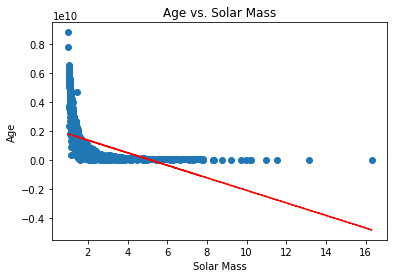

In [13]:
plt.scatter(Mass, Age)
plt.xlabel('Solar Mass')
plt.ylabel('Age')
z = np.polyfit(Mass, Age, 1)
p = np.poly1d(z)
plt.plot(Mass,p(Mass),"r--")
plt.title('Age vs. Solar Mass')
plt.show()

I will be calculating Spearman's correlation coefficient because it determines the strength and direction of the monotonic relationship between two variables. 

In [19]:
from scipy.stats.stats import spearmanr
spearmanr(Mass, Age)

SpearmanrResult(correlation=-0.9110662798157629, pvalue=0.0)

For my data set, there is a strong negative Spearman correlation between solar mass and age, further supporting the alternative hypothesis. 

<b> Set up an appropriate hypothesis test.</b></p><p>
    Ho: There is no significant correlation between solar mass and luminosity.</p><p>
    Ha: There is a significant correlation between solar mass and luminosity.

In [12]:
luminosity = star_data['logL']
scipy.stats.ttest_ind(Mass, luminosity)

Ttest_indResult(statistic=18.15792789543915, pvalue=2.734064581297351e-68)

For my sample data, the p-value is 67 orders of magnitude smaller than the predetermined significance value, alpha (0.05), when comparing solar mass and luminosity. As a result, we can reject the null hypothesis and accept the alternative hypothesis that states there is a signicant correlation between solar mass and luminosity. 

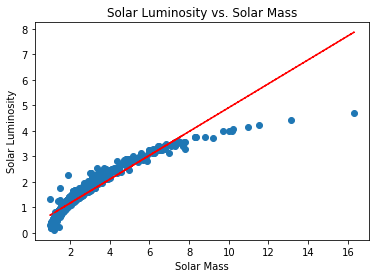

In [20]:
plt.scatter(Mass, luminosity)
plt.xlabel('Solar Mass')
plt.ylabel('Solar Luminosity')
z = np.polyfit(Mass, luminosity, 1)
p = np.poly1d(z)
plt.plot(Mass,p(Mass),"r--")
plt.title('Solar Luminosity vs. Solar Mass')
plt.show()

In [21]:
spearmanr(Mass, luminosity)

SpearmanrResult(correlation=0.9824006738145072, pvalue=0.0)

For my data set, there is a strong, positive, almost linear Spearman correlation between solar mass and age, further supporting the alternative hypothesis. 